In [13]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns


# *Customized Data*

In [14]:
data={'Age':[22,25,47,52,46,56,55,120,45,25,23,36,37,38,39,40,160,5,-1,200],
      'Salary':[5000,7000,12000,13000,11000,13000,1000,0,-6000,8000,40000,200000,-20000,4,8000,7000,6000,5000,0,6000],
      'Experience':[2,2,5,7,6,8,7,10,5,-5,1,15,16,17,18,19,20,0,-1,100],
      'no_of_car':[1,0,2,3,2,4,3,5,2,0,1,3,4,3000,9,10,-11,0,-1,100]}

In [15]:
df=pd.DataFrame(data)
df

,Age,Salary,Experience,no_of_car
0,22,5000,2,1
1,25,7000,2,0
2,47,12000,5,2
3,52,13000,7,3
4,46,11000,6,2
5,56,13000,8,4
6,55,1000,7,3
7,120,0,10,5
8,45,-6000,5,2
9,25,8000,-5,0


# ________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________

In [16]:
df.describe()   

,Age,Salary,Experience,no_of_car
count,20.00000,20.000000,20.000000,20.000000
mean,53.50000,15800.200000,12.600000,156.850000
std,49.99421,44718.460579,21.840089,669.578129
min,-1.00000,-20000.000000,-5.000000,-11.000000
25%,25.00000,751.000000,2.000000,0.750000
50%,39.50000,6500.000000,7.000000,2.500000
75%,52.75000,11250.000000,16.250000,4.250000
max,200.00000,200000.000000,100.000000,3000.000000


# *Box Plot With Outlier*

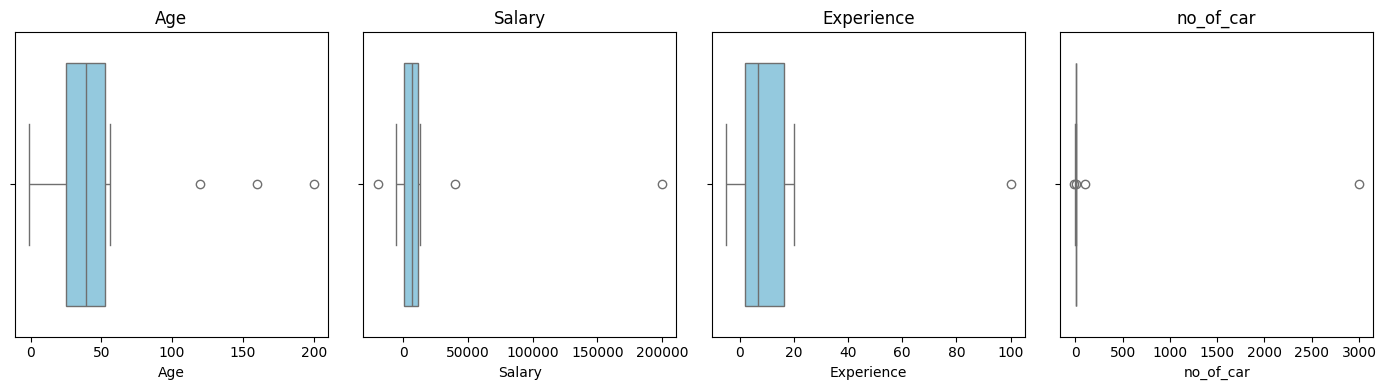

In [17]:
plt.figure(figsize=(14,4))
for i, c in enumerate(df.columns):
    plt.subplot(1, len(df.columns), i+1)
    sns.boxplot(x=df[c], color='skyblue', orient='h')
    plt.title(c)
plt.tight_layout()
plt.show() 

# ________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________

# *Scatter Plot With Outlier*

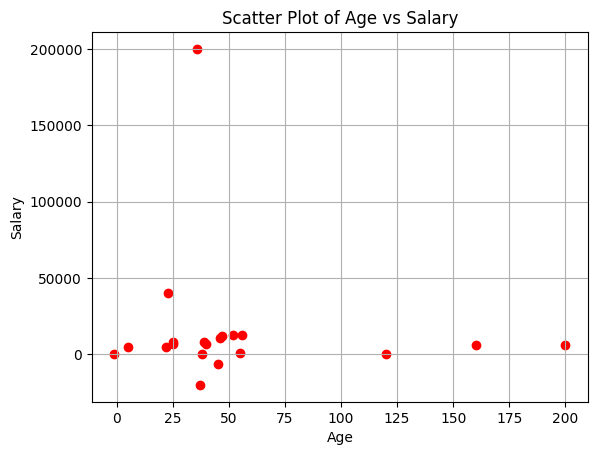

In [18]:
plt.scatter(df['Age'], df['Salary'], color='red')

plt.title("Scatter Plot of Age vs Salary") 
plt.xlabel("Age")         
plt.ylabel("Salary")          
plt.grid(True)                    

plt.show()

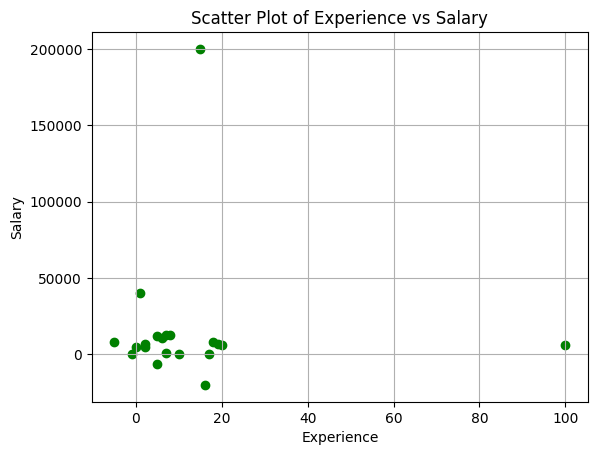

In [19]:
plt.scatter(df['Experience'], df['Salary'], color='green') 
plt.title("Scatter Plot of Experience vs Salary") 
plt.xlabel("Experience")    
plt.ylabel("Salary")
plt.grid(True)

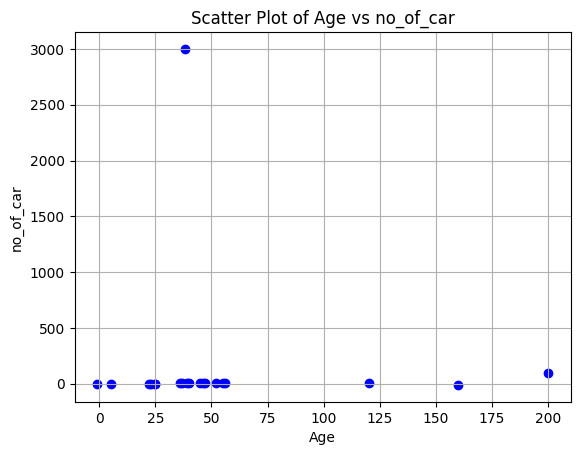

In [20]:
plt.scatter (df['Age'], df['no_of_car'], color='blue')
plt.title("Scatter Plot of Age vs no_of_car")
plt.xlabel("Age")   
plt.ylabel("no_of_car")
plt.grid(True)
plt.show()

# ________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________

# *Histogram With Outlier*

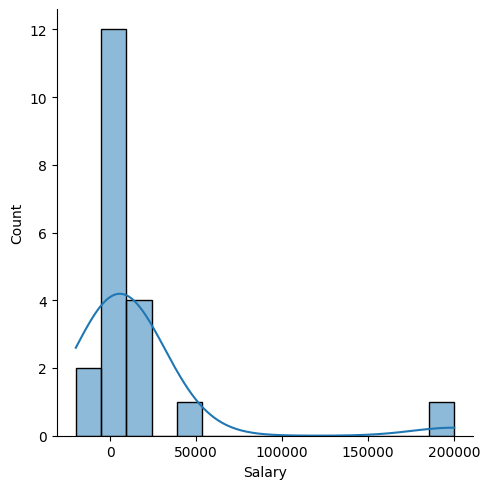

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.displot(df['Salary'], kde=True, bins=15)
plt.show()

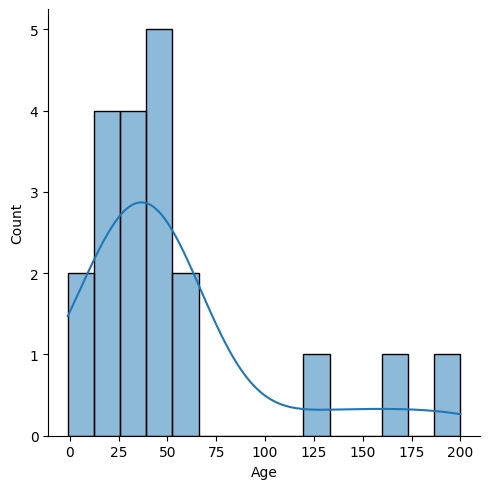

In [22]:
sns.displot(df['Age'], kde=True, bins=15)
plt.show()

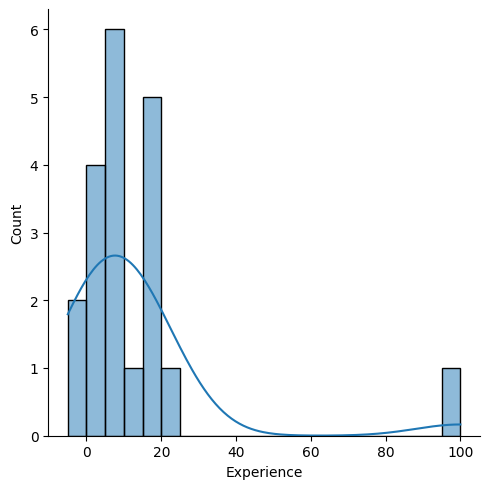

In [23]:
sns.displot(df['Experience'], kde=True, binwidth=5)
plt.show()

# ________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________________

In [24]:
df_no_negative = df[(df >= 0).all(axis=1)]

df_no_negative

,Age,Salary,Experience,no_of_car
0,22,5000,2,1
1,25,7000,2,0
2,47,12000,5,2
3,52,13000,7,3
4,46,11000,6,2
5,56,13000,8,4
6,55,1000,7,3
7,120,0,10,5
10,23,40000,1,1
11,36,200000,15,3


In [25]:
df_IQR=df_no_negative.copy()

In [26]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_clean = df_IQR[~((df_IQR < lower_bound) | (df_IQR > upper_bound)).any(axis=1)]

print(f"Original size: {len(df_IQR)}")
print(f"Cleaned size: {len(df_clean)}")

Original size: 15
Cleaned size: 9


In [27]:
df_clean

,Age,Salary,Experience,no_of_car
0,22,5000,2,1
1,25,7000,2,0
2,47,12000,5,2
3,52,13000,7,3
4,46,11000,6,2
5,56,13000,8,4
6,55,1000,7,3
14,39,8000,18,9
17,5,5000,0,0


In [28]:
df_Zscore = df_no_negative.copy()

In [29]:
from scipy import stats

z_scores = stats.zscore(df_Zscore)

df_clean_Zscore = df_Zscore[(np.abs(z_scores) < 3).all(axis=1)]

print(f"Original size: {len(df_Zscore)}")
print(f"Cleaned size: {len(df_clean_Zscore)}")

Original size: 15
Cleaned size: 12


In [30]:
df_clean_Zscore

,Age,Salary,Experience,no_of_car
0,22,5000,2,1
1,25,7000,2,0
2,47,12000,5,2
3,52,13000,7,3
4,46,11000,6,2
5,56,13000,8,4
6,55,1000,7,3
7,120,0,10,5
10,23,40000,1,1
14,39,8000,18,9


# *Isolation Forest For Handeling Outlier*

In [31]:
import pandas as pd

In [32]:
ML_Data={'Age':[22,25,47,52,46,56,55,120,45,25,23,36,37,38,39,40,160,5,-1,200],
      'Salary':[5000,7000,12000,13000,11000,13000,1000,0,-6000,8000,40000,200000,-20000,4,8000,7000,6000,5000,0,6000],
      'Experience':[2,2,5,7,6,8,7,10,5,-5,1,15,16,17,3,19,20,0,-1,100],
      'no_of_car':[1,0,2,3,2,4,3,5,2,0,1,3,4,3000,9,10,-11,0,-1,100]}

In [33]:
IsolationForest_Data=pd.DataFrame(ML_Data)

In [34]:
IsolationForest_Data

,Age,Salary,Experience,no_of_car
0,22,5000,2,1
1,25,7000,2,0
2,47,12000,5,2
3,52,13000,7,3
4,46,11000,6,2
5,56,13000,8,4
6,55,1000,7,3
7,120,0,10,5
8,45,-6000,5,2
9,25,8000,-5,0


In [35]:
IsolationForest_Data = IsolationForest_Data[(IsolationForest_Data >= 0).all(axis=1)]

In [36]:
IsolationForest_Data

,Age,Salary,Experience,no_of_car
0,22,5000,2,1
1,25,7000,2,0
2,47,12000,5,2
3,52,13000,7,3
4,46,11000,6,2
5,56,13000,8,4
6,55,1000,7,3
7,120,0,10,5
10,23,40000,1,1
11,36,200000,15,3


# *في الايزولشن فورست هو بيكريت عمود ويفلتر علية الداتا*

In [37]:
from sklearn.ensemble import IsolationForest


model = IsolationForest(contamination=0.3, random_state=42) 

IsolationForest_Data['anomaly'] = model.fit_predict(IsolationForest_Data)

df_cleaned_Isolation_forest = IsolationForest_Data[IsolationForest_Data['anomaly'] == 1].drop(columns=['anomaly'])

print(f"Original size: {len(IsolationForest_Data)}")
print(f"Cleaned size: {len(df_cleaned_Isolation_forest)}")

Original size: 15
Cleaned size: 10


C:\Users\PC\AppData\Local\Temp\ipykernel_15792\585243813.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  IsolationForest_Data['anomaly'] = model.fit_predict(IsolationForest_Data)


In [38]:
df_cleaned_Isolation_forest

,Age,Salary,Experience,no_of_car
0,22,5000,2,1
1,25,7000,2,0
2,47,12000,5,2
3,52,13000,7,3
4,46,11000,6,2
5,56,13000,8,4
6,55,1000,7,3
14,39,8000,3,9
15,40,7000,19,10
17,5,5000,0,0


### *Local Outlier Factor And DBSCAN ALgorithm That are Depends On The Distances Between Points* 

# *We Must Applaying The Scaling Before Using This Algorithms*

In [39]:
from sklearn.preprocessing import MinMaxScaler 
scaler=MinMaxScaler()

In [40]:
df_Scaled=scaler.fit_transform(df_cleaned_Isolation_forest)

In [42]:
df_Scaled=pd.DataFrame(df_Scaled,columns=df_cleaned_Isolation_forest.columns)

In [43]:
df_Scaled.describe()

,Age,Salary,Experience,no_of_car
count,10.000000,10.000000,10.000000,10.000000
mean,0.660784,0.600000,0.310526,0.340000
std,0.324706,0.332870,0.278997,0.347051
min,0.000000,0.000000,0.000000,0.000000
25%,0.460784,0.375000,0.118421,0.125000
50%,0.745098,0.541667,0.289474,0.250000
75%,0.897059,0.895833,0.368421,0.375000
max,1.000000,1.000000,1.000000,1.000000


# *Now The Scaling Is Applayed*

## *Applay the DBScan and Local Outlier Factor To Dealing Outliers*

In [53]:
from  sklearn.neighbors import LocalOutlierFactor
model=LocalOutlierFactor(contamination=0.02,n_neighbors=3)
df_Scaled['anomaly']=model.fit_predict(df_Scaled)

In [54]:
df_Scaled

,Age,Salary,Experience,no_of_car,anomaly
0,0.333333,0.333333,0.105263,0.1,1
1,0.392157,0.500000,0.105263,0.0,1
2,0.823529,0.916667,0.263158,0.2,1
3,0.921569,1.000000,0.368421,0.3,1
4,0.803922,0.833333,0.315789,0.2,1
5,1.000000,1.000000,0.421053,0.4,1
6,0.980392,0.000000,0.368421,0.3,-1
7,0.666667,0.583333,0.157895,0.9,1
8,0.686275,0.500000,1.000000,1.0,1
9,0.000000,0.333333,0.000000,0.0,1


In [55]:
LOF_DATA=df_Scaled[df_Scaled['anomaly']==1].drop(columns=['anomaly'])
LOF_DATA

,Age,Salary,Experience,no_of_car
0,0.333333,0.333333,0.105263,0.1
1,0.392157,0.500000,0.105263,0.0
2,0.823529,0.916667,0.263158,0.2
3,0.921569,1.000000,0.368421,0.3
4,0.803922,0.833333,0.315789,0.2
5,1.000000,1.000000,0.421053,0.4
7,0.666667,0.583333,0.157895,0.9
8,0.686275,0.500000,1.000000,1.0
9,0.000000,0.333333,0.000000,0.0


In [56]:
df_Scaled

,Age,Salary,Experience,no_of_car,anomaly
0,0.333333,0.333333,0.105263,0.1,1
1,0.392157,0.500000,0.105263,0.0,1
2,0.823529,0.916667,0.263158,0.2,1
3,0.921569,1.000000,0.368421,0.3,1
4,0.803922,0.833333,0.315789,0.2,1
5,1.000000,1.000000,0.421053,0.4,1
6,0.980392,0.000000,0.368421,0.3,-1
7,0.666667,0.583333,0.157895,0.9,1
8,0.686275,0.500000,1.000000,1.0,1
9,0.000000,0.333333,0.000000,0.0,1


# *شيلت عمود ال انوميلي بتاع اللوكل اوتلير فاكتور*

In [57]:
df_Scaled=df_Scaled.drop(columns=['anomaly'])

In [69]:
from sklearn.cluster import DBSCAN
model =DBSCAN(eps=0.5,min_samples=2)
df_Scaled['cluster']=model.fit_predict(df_Scaled)
df_Scaled   

,Age,Salary,Experience,no_of_car,cluster
0,0.333333,0.333333,0.105263,0.1,0
1,0.392157,0.500000,0.105263,0.0,0
2,0.823529,0.916667,0.263158,0.2,1
3,0.921569,1.000000,0.368421,0.3,1
4,0.803922,0.833333,0.315789,0.2,1
5,1.000000,1.000000,0.421053,0.4,1
6,0.980392,0.000000,0.368421,0.3,-1
7,0.666667,0.583333,0.157895,0.9,-1
8,0.686275,0.500000,1.000000,1.0,-1
9,0.000000,0.333333,0.000000,0.0,0
